# Task 1: Data Exploration and Basic Statistics



In [ ]:
# Purpose: Load essential libraries for data manipulation (pandas, numpy),
# statistical operations (scipy.stats), and data visualization (matplotlib.pyplot).

import pandas as pd
import numpy as np
from scipy import stats


In [ ]:
# Purpose: Load movie dataset into a pandas DataFrame.
# head() displays the first 5 rows to preview the data.

df = pd.read_csv("Movie_Data (1).csv")
df.head()


,title,genre,rating,release_year,box_office
0,Movie 1,Drama,3.5,2017,1203441917
1,Movie 2,Drama,4.5,2010,635116663
2,Movie 3,Thriller,5.8,2019,1541264226
3,Movie 4,Drama,8.6,2003,735554784
4,Movie 5,Comedy,6.3,2014,1396345053


In [ ]:
# df.info: Displays data types and non-null counts.
# describe(): Statistical summary including mean, count, std, etc.
# df.columns: Lists all column names.

df.info
df.describe(include='all')
df.columns

Index(['title', 'genre', 'rating', 'release_year', 'box_office'], dtype='object')

In [ ]:
# Purpose: Identify missing data in each column.

df.isnull().sum()

,0
title,0
genre,0
rating,0
release_year,0
box_office,0


In [ ]:
# Find Movie with Highest Box Office Earnings
# Purpose: Find the movie with the highest box office earnings.
# Displays details like title, genre, rating, and release_year.

top_movie = df.sort_values(by='box_office', ascending=False).iloc[0]

print("Title:", top_movie['title'])
print("Genre:", top_movie['genre'])
print("Rating:", top_movie['rating'])
print("Release Year:", top_movie['release_year'])


Title: Movie 20
Genre: Horror
Rating: 1.2
Release Year: 2018


In [ ]:
# Rating: Mean value of movie ratings.

average_rating = df['rating'].mean()
print("Average Rating:", round(average_rating,2))

Average Rating: 5.59


In [ ]:
# Median Rating: Middle rating value.

median_rating = df['rating'].median()
print("Median Rating:", int(median_rating))

Median Rating: 5


In [ ]:
# Mode Genre: Most frequently occurring movie genre.

mode_genre = df['genre'].mode()
print("Mode Genre:", mode_genre)

Mode Genre: 0    Comedy
Name: genre, dtype: object


# Task 2: Data Transformation


In [ ]:
# Purpose: Create a new DataFrame with movies rated 7 or higher.

high_rated_movies = df[df['rating'] >= 7]
print(high_rated_movies)

       title     genre  rating  release_year  box_office
3    Movie 4     Drama     8.6          2003   735554784
10  Movie 11    Comedy     9.0          2018  1956641510
11  Movie 12    Horror     9.6          2003   681020606
13  Movie 14    Action     9.1          2009   540243881
16  Movie 17  Thriller     7.8          2020  1909403222
25  Movie 26    Action     9.2          2018  1884776336
30  Movie 31  Thriller     9.3          2003  1163312251
34  Movie 35    Comedy     8.7          2007   634403854
35  Movie 36    Action     8.2          2000  1282931288
36  Movie 37    Horror     8.8          2003  1422968393
39  Movie 40    Action     8.5          2010   402972563
43  Movie 44    Action     7.6          2016  1919952302
44  Movie 45    Comedy     9.2          2005  1138648654
47  Movie 48     Drama     9.3          2013  1776382539
48  Movie 49    Horror     8.6          2002   885975587
49  Movie 50     Drama     7.1          2023  1376039520


In [ ]:
# Sort by Box Office Earnings and Show Top 10
top_10_earnings_movies = df.sort_values(by='box_office', ascending=False).head(10)
top_10_earnings_movies[['title', 'box_office', 'rating']]


,title,box_office,rating
19,Movie 20,1971919840,1.2
10,Movie 11,1956641510,9.0
20,Movie 21,1930454283,1.4
46,Movie 47,1926080840,5.3
43,Movie 44,1919952302,7.6
16,Movie 17,1909403222,7.8
25,Movie 26,1884776336,9.2
29,Movie 30,1883738397,3.5
23,Movie 24,1831436334,6.5
47,Movie 48,1776382539,9.3


In [ ]:
#Step 3: Add a “profitability” Column
# Purpose: Adds a new column profitability by dividing box office value by 100 million for normalized comparison.

df['profitability'] = df['box_office'] / 100000000
df[['title', 'box_office', 'profitability']].head()

,title,box_office,profitability
0,Movie 1,1203441917,12.034419
1,Movie 2,635116663,6.351167
2,Movie 3,1541264226,15.412642
3,Movie 4,735554784,7.355548
4,Movie 5,1396345053,13.963451


# Task 3: Advanced Analysis


In [ ]:
# Purpose: Analyze average rating and average box office collection by each genre.

genre_grouped = df.groupby('genre').agg({'rating': 'mean','box_office': 'mean'}).reset_index()

genre_grouped.rename(columns={'rating': 'Avg Rating', 'box_office': 'Avg Box Office'}, inplace=True)
genre_grouped


,genre,Avg Rating,Avg Box Office
0,Action,6.470000,1.239265e+09
1,Comedy,5.658333,1.128515e+09
2,Drama,5.200000,1.111896e+09
3,Horror,5.837500,1.269256e+09
4,Thriller,4.820000,1.031773e+09


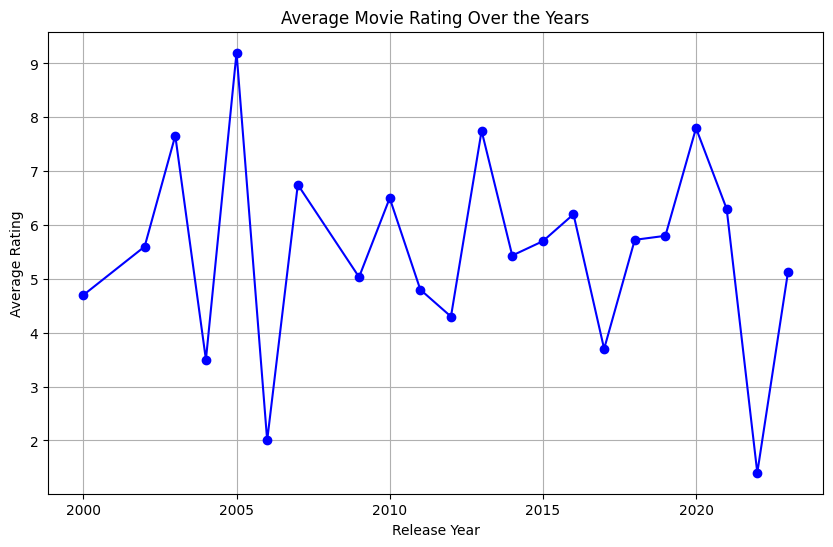

In [ ]:
# Plot Line Graph – Average Rating over the Years

import matplotlib.pyplot as plt

# Group by year and calculate average rating
rating_trend = df.groupby('release_year')['rating'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(rating_trend['release_year'], rating_trend['rating'], marker='o', color='blue')
plt.title("Average Movie Rating Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Average Rating")
plt.grid(True)
plt.show()
